In [27]:
# Load dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [28]:
# Take only first 100 samples to remove Virginica
features = iris.data[:100, :]
target = iris.target[:100]

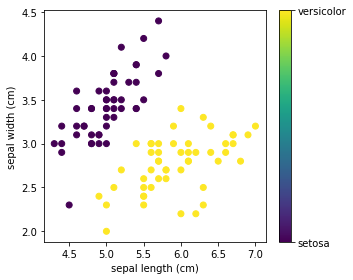

In [29]:
import matplotlib.pyplot as plt
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.figure(figsize=(5, 4))
plt.scatter(features[:, x_index], features[:, y_index], c=target)
plt.colorbar(ticks=[0, 1], format=formatter)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

# Show the scatter plot
plt.tight_layout()
plt.show()

In [30]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split
datasets = train_test_split(features, target, test_size=0.2)

X_train, X_test, Y_train, Y_test = datasets

In [31]:
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np
class Perceptron:
  
  #constructor
  def __init__ (self):
    self.w = None
    self.b = None
    
  #model  
  def model(self, x):
    return 1 if (np.dot(self.w, x) >= self.b) else 0
  
  #predictor to predict on the data based on w
  def predict(self, X):
    Y = []
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)
    
  def fit(self, X, Y, epochs = 1, lr = 1):
    self.w = np.ones(X.shape[1])
    self.b = 0
    accuracy = {}
    max_accuracy = 0
    wt_matrix = []
    #for all epochs
    for i in range(epochs):
      for x, y in zip(X, Y):
        y_pred = self.model(x)
        if y == 1 and y_pred == 0:
          self.w = self.w + lr * x
          self.b = self.b - lr * 1
        elif y == 0 and y_pred == 1:
          self.w = self.w - lr * x
          self.b = self.b + lr * 1
          
      wt_matrix.append(self.w)    
      accuracy[i] = accuracy_score(self.predict(X), Y)
      if (accuracy[i] > max_accuracy):
        max_accuracy = accuracy[i]
        chkptw = self.w
        chkptb = self.b
    #checkpoint (Save the weights and b value)
    self.w = chkptw
    self.b = chkptb
        
    print(max_accuracy)
    
    #return the weight matrix, that contains weights over all epochs
    return np.array(wt_matrix)

In [32]:
perceptron = Perceptron()
model = perceptron.fit(X_train, Y_train)

1.0


In [33]:
# Look at some randomly chosen random X values:
import random
sample = random.sample(range(len(X_train)), 10)
for i in sample:
    print(i, perceptron.predict([X_train[i]]))

32 [1]
29 [0]
50 [1]
2 [1]
23 [1]
70 [1]
37 [1]
48 [0]
1 [1]
52 [0]


In [34]:
# Making predictions on test data
Y_pred_test = perceptron.predict(X_test)

# Checking the accuracy of the model
print(accuracy_score(Y_pred_test, Y_test))

1.0


In [35]:
# From confusion matrix calculate precision and recall
from sklearn.metrics import classification_report
print(classification_report(perceptron.predict(X_train), Y_train))
print(classification_report(perceptron.predict(X_test), Y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        41

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         9

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20

